In [3]:
import pandas as pd
import xarray as xr
import numpy as np

In [8]:
ds = xr.open_dataset("data/CSR_GRACE_GRACE-FO_RL0602_Mascons_all-corrections.nc")
ds

<xarray.Dataset>
Dimensions:        (time: 232, timebound: 2, lon: 1440, lat: 720)
Coordinates:
  * time           (time) float32 107.0 129.5 227.5 ... 8.11e+03 8.141e+03
  * lon            (lon) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * lat            (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
Dimensions without coordinates: timebound
Data variables:
    time_bounds    (time, timebound) float32 ...
    lwe_thickness  (time, lat, lon) float32 ...
Attributes: (12/59)
    Conventions:                CF-1.6, ACDD-1.3, ISO 8601
    filename:                   netcdf/CSR_GRACE_GRACE-FO_RL0602_Mascons_all-...
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    title:                      CSR GRACE and GRACE-FO MASCON RL0602M
    subtitle:                   RL06.2 GRACE/GRACE-FO Total water storage wit...
    ...                         ...
    user_note_3:                Ellipsoidal correction has been applied. The ...
    user_note_4:                This GRACE-FO RL06.2 data is an updated versi...
    date_created:               2024-07-14T18:38:23Z
    variable:                   liquid water equivalent thickness
    label:                      RL0602rc24cE
    Mask:                       Global

In [ ]:
# variables in dataset
ds.data_vars

Data variables:
    time_bounds    (time, timebound) float32 ...
    lwe_thickness  (time, lat, lon) float32 ...

In [5]:
ds.dims

Frozen({'time': 232, 'timebound': 2, 'lon': 1440, 'lat': 720})

In [14]:
ds.coords

Coordinates:
  * time     (time) float32 107.0 129.5 227.5 ... 8.08e+03 8.11e+03 8.141e+03
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88

In [16]:
ds.info()

xarray.Dataset {
dimensions:
	time = 232 ;
	timebound = 2 ;
	lon = 1440 ;
	lat = 720 ;

variables:
	float32 time_bounds(time, timebound) ;
	float32 time(time) ;
		time:bounds = time_bounds ;
		time:calendar = gregorian ;
		time:axis = T ;
		time:standard_name = Time ;
		time:long_name = Time ;
		time:Units = days since 2002-01-01T00:00:00Z ;
	float32 lon(lon) ;
		lon:bounds = lon_bounds ;
		lon:valid_max = 359.875 ;
		lon:valid_min = 0.125 ;
		lon:axis = X ;
		lon:standard_name = Longitude ;
		lon:long_name = Longitude ;
		lon:Units = degrees_east ;
	float32 lat(lat) ;
		lat:bounds = lat_bounds ;
		lat:valid_max = 89.875 ;
		lat:valid_min = -89.875 ;
		lat:axis = Y ;
		lat:standard_name = Latitude ;
		lat:long_name = Latitude ;
		lat:Units = degrees_north ;
	float32 lwe_thickness(time, lat, lon) ;
		lwe_thickness:grid_mapping = WGS84 ;
		lwe_thickness:standard_name = Liquid_Water_Equivalent_Thickness ;
		lwe_thickness:long_name = Liquid_Water_Equivalent_Thickness ;
		lwe_thickness:Unit

In [9]:
ds.attrs

{'Conventions': 'CF-1.6, ACDD-1.3, ISO 8601',
 'filename': 'netcdf/CSR_GRACE_GRACE-FO_RL0602_Mascons_all-corrections.nc',
 'Metadata_Conventions': 'Unidata Dataset Discovery v1.0',
 'standard_name_vocabulary': 'NetCDF Climate and Forecast (CF) Metadata Convention-1.6',
 'title': 'CSR GRACE and GRACE-FO MASCON RL0602M',
 'subtitle': 'RL06.2 GRACE/GRACE-FO Total water storage with all correction applied',
 'summary': 'Monthly mass anomaly grids from GRACE and GRACE-FO determined from CSR RL06.2 processing',
 'keywords': 'Solid Earth, Geodetics/Gravity, Gravity, liquid_water_equivalent_thickness',
 'keywords_vocabulary': 'NASA Global Change Master Directory (GCMD) Science Keywords',
 'platform': 'GRACE and GRACE-FO',
 'institution': 'The University of Texas - Center for Space Research (CSR)',
 'creator_name': 'Himanshu Save',
 'creator_email': 'grace@csr.utexas.edu',
 'creator_url': 'http://www2.csr.utexas.edu/grace',
 'creator_type': 'group',
 'creator_institution': 'UT-CSR',
 'publisher

In [63]:
# check the unit of the time and change to datatime dtype if necessary
ds.lwe_thickness.time.attrs["Units"]

'days since 2002-01-01T00:00:00Z'

In [9]:
# Extract the time coordinate values and units
time_values = ds.lwe_thickness.time.values
time_units = ds.lwe_thickness.time.attrs['Units']

# Extract the base time from the Units attribute
base_time_str = time_units.split('since ')[1]
base_time = pd.to_datetime(base_time_str)
time_as_datetime = base_time + pd.to_timedelta(time_values, unit='D')

time_as_datetime_np = np.array(time_as_datetime, dtype='datetime64[ns]')

# Replace the time coordinate in the dataset with the datetime64 values
ds = ds.assign_coords(time=('time', time_as_datetime_np))
ds

<xarray.Dataset>
Dimensions:        (time: 232, timebound: 2, lon: 1440, lat: 720)
Coordinates:
  * time           (time) datetime64[ns] 2002-04-18 ... 2024-04-16
  * lon            (lon) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * lat            (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
Dimensions without coordinates: timebound
Data variables:
    time_bounds    (time, timebound) float32 ...
    lwe_thickness  (time, lat, lon) float32 ...
Attributes: (12/59)
    Conventions:                CF-1.6, ACDD-1.3, ISO 8601
    filename:                   netcdf/CSR_GRACE_GRACE-FO_RL0602_Mascons_all-...
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    title:                      CSR GRACE and GRACE-FO MASCON RL0602M
    subtitle:                   RL06.2 GRACE/GRACE-FO Total water storage wit...
    ...                         ...
    user_note_3:                Ellipsoidal correction has been applied. The ...
    user_note_4:                This GRACE-FO RL06.2 data is an updated versi...
    date_created:               2024-07-14T18:38:23Z
    variable:                   liquid water equivalent thickness
    label:                      RL0602rc24cE
    Mask:                       Global

In [73]:
ds.lwe_thickness

<xarray.DataArray 'lwe_thickness' (time: 232, lat: 720, lon: 1440)>
[240537600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2002-04-18 2002-05-10T12:00:00 ... 2024-04-16
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
Attributes:
    grid_mapping:   WGS84
    standard_name:  Liquid_Water_Equivalent_Thickness
    long_name:      Liquid_Water_Equivalent_Thickness
    Units:          cm

In [127]:
ds.time_bounds

<xarray.DataArray 'time_bounds' (time: 232, timebound: 2)>
array([[  94.,  120.],
       [ 122.,  137.],
       [ 212.,  243.],
       ...,
       [8066., 8095.],
       [8095., 8126.],
       [8126., 8156.]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2002-04-18 2002-05-10T12:00:00 ... 2024-04-16
Dimensions without coordinates: timebound

In [16]:
ds.lwe_thickness.values

array([[[-2.7126658 , -2.7126658 , -2.7126658 , ..., -2.7126658 ,
         -2.7126658 , -2.7126658 ],
        [-2.7126658 , -2.7126658 , -2.7126658 , ..., -2.7126658 ,
         -2.7126658 , -2.7126658 ],
        [-3.493693  , -3.493693  , -3.493693  , ..., -3.493693  ,
         -3.493693  , -3.493693  ],
        ...,
        [-2.4626598 , -2.4626598 , -2.4626598 , ..., -2.4626598 ,
         -2.4626598 , -2.4626598 ],
        [-2.62308   , -2.62308   , -2.62308   , ..., -2.62308   ,
         -2.62308   , -2.62308   ],
        [-2.62308   , -2.62308   , -2.62308   , ..., -2.62308   ,
         -2.62308   , -2.62308   ]],

       [[-1.9613819 , -1.9613819 , -1.9613819 , ..., -1.9613819 ,
         -1.9613819 , -1.9613819 ],
        [-1.9613819 , -1.9613819 , -1.9613819 , ..., -1.9613819 ,
         -1.9613819 , -1.9613819 ],
        [-2.8264503 , -2.8264503 , -2.8264503 , ..., -2.8264503 ,
         -2.8264503 , -2.8264503 ],
        ...,
        [-4.330787  , -4.330787  , -4.330787  , ..., -

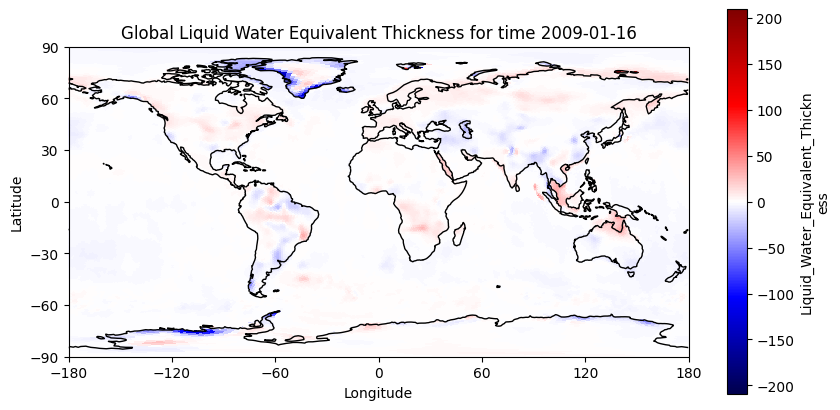

In [141]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import datetime as dt

plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

timeslice = ds.sel(time=dt.datetime(2009,1,10), method="nearest")   # edit to date of choice
timeslice.lwe_thickness.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="seismic")
ax.coastlines()
plt.title(f'Global Liquid Water Equivalent Thickness for date {timeslice.time.values.astype("datetime64[D]")}')
ax.set_xticks(range(-180, 181, 60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-90, 91, 30), crs=ccrs.PlateCarree())
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [10]:
# convert dataset to datafram
df = ds.to_dataframe()
df

time_bounds  lwe_thickness
time       timebound lon     lat                                
2002-04-18 0         0.125   -89.875         94.0      -2.712666
                             -89.625         94.0      -2.712666
                             -89.375         94.0      -3.493693
                             -89.125         94.0      -3.493693
                             -88.875         94.0      -3.493693
...                                           ...            ...
2024-04-16 1         359.875  88.875       8156.0       5.076348
                              89.125       8156.0       5.076348
                              89.375       8156.0       5.076348
                              89.625       8156.0       4.672384
                              89.875       8156.0       4.672384

[481075200 rows x 2 columns]

In [11]:
df.reset_index(inplace=True)

In [12]:
df_agg = df.groupby("time").mean().reset_index()
df_agg

,time,timebound,lon,lat,time_bounds,lwe_thickness
0,2002-04-18 00:00:00,0.5,180.0,0.0,107.000000,0.586796
1,2002-05-10 12:00:00,0.5,180.0,0.0,129.500000,0.314606
2,2002-08-16 12:00:00,0.5,180.0,0.0,227.500000,0.553624
3,2002-09-16 00:00:00,0.5,180.0,0.0,258.000000,0.623131
4,2002-10-16 12:00:00,0.5,180.0,0.0,288.500000,0.264563
...,...,...,...,...,...,...
227,2023-12-16 12:00:00,0.5,180.0,0.0,8019.500488,-2.581772
228,2024-01-16 12:00:00,0.5,180.0,0.0,8050.499512,-2.719551
229,2024-02-15 12:00:00,0.5,180.0,0.0,8080.499512,-2.449597
230,2024-03-16 12:00:00,0.5,180.0,0.0,8110.499512,-2.432329


In [7]:
# timebound 1 for land and 0 for ocean
land_lwe_thickness = df[df["timebound"]==1]
land_lwe_thickness

,time,timebound,lon,lat,time_bounds,lwe_thickness
1036800,2002-04-18,1,0.125,-89.875,120.0,-2.712666
1036801,2002-04-18,1,0.125,-89.625,120.0,-2.712666
1036802,2002-04-18,1,0.125,-89.375,120.0,-3.493693
1036803,2002-04-18,1,0.125,-89.125,120.0,-3.493693
1036804,2002-04-18,1,0.125,-88.875,120.0,-3.493693
...,...,...,...,...,...,...
481075195,2024-04-16,1,359.875,88.875,8156.0,5.076348
481075196,2024-04-16,1,359.875,89.125,8156.0,5.076348
481075197,2024-04-16,1,359.875,89.375,8156.0,5.076348
481075198,2024-04-16,1,359.875,89.625,8156.0,4.672384


In [9]:
land_lwe_thickness[land_lwe_thickness["time"]=="2002-04-18"]

,time,timebound,lon,lat,time_bounds,lwe_thickness
1036800,2002-04-18,1,0.125,-89.875,120.0,-2.712666
1036801,2002-04-18,1,0.125,-89.625,120.0,-2.712666
1036802,2002-04-18,1,0.125,-89.375,120.0,-3.493693
1036803,2002-04-18,1,0.125,-89.125,120.0,-3.493693
1036804,2002-04-18,1,0.125,-88.875,120.0,-3.493693
...,...,...,...,...,...,...
2073595,2002-04-18,1,359.875,88.875,120.0,-2.462660
2073596,2002-04-18,1,359.875,89.125,120.0,-2.462660
2073597,2002-04-18,1,359.875,89.375,120.0,-2.462660
2073598,2002-04-18,1,359.875,89.625,120.0,-2.623080


### Surface water temperature data from NOAA

In [2]:
url = "https://www.ncei.noaa.gov/thredds/dodsC/noaa-global-temp-v5.1/NOAAGlobalTemp_v5.1.0_gridded_s185001_e202312_c20240108T150239.nc"
temp_ds = xr.open_dataset(url)
temp_ds

<xarray.Dataset>
Dimensions:  (time: 2088, lat: 36, lon: 72, z: 1)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2023-12-01
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 0.0
Data variables:
    anom     (time, z, lat, lon) float32 ...
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P174Y0M
    references:                      Vose, R. S., et al., 2012: NOAAs merged ...
    climatology:                     Climatology is based on 1971-2000 monthl...
    acknowledgment:                  The NOAA Global Surface Temperature Data...
    date_modified:                   2024-01-08T20:02:41Z
    date_issued:                     2024-01-08T20:02:41Z

In [3]:
temp_ds.attrs

{'Conventions': 'CF-1.6, ACDD-1.3',
 'title': 'NOAA Merged Land Ocean Global Surface Temperature Analysis (NOAAGlobalTemp)',
 'summary': 'NOAAGlobalTemp is a merged land-ocean surface temperature analysis, formerly abbreviated as MLOST. The SST dataset is the Extended Reconstructed Sea Surface Temperature (ERSST) and the land surface air temperature dataset is from the Global Historical Climatology Network Monthly (GHCN-M) database.',
 'institution': 'DOC/NOAA/NESDIS/National Centers for Environmental Information(NCEI)',
 'id': ' gov.noaa.ncdc:C00934 ',
 'naming_authority': ' gov.noaa.ncei ',
 'project': ' NOAAGlobalTemp ',
 'platform': 'Ships, moored buoys, surface drifting buoys, Argo floats, and weather stations',
 'instrument': 'Conventional thermometers',
 'history': 'Version 5.1.0, blending ERSST V5 and GHCN-M V4.',
 'comment': 'Merged land ocean surface temperature anomalies.',
 'product_version': '5.1.0',
 'source': 'NOAAGlobalTemp combines a global sea surface temperature with

In [4]:
temp_ds.info()

xarray.Dataset {
dimensions:
	time = 2088 ;
	lat = 36 ;
	lon = 72 ;
	z = 1 ;

variables:
	datetime64[ns] time(time) ;
		time:long_name = reference time of global temperature anomalies ;
		time:standard_name = time ;
		time:coverage_content_type = coordinate ;
		time:axis = T ;
	float32 lat(lat) ;
		lat:long_name = Latitude ;
		lat:standard_name = latitude ;
		lat:coverage_content_type = coordinate ;
		lat:units = degrees_north ;
		lat:grids = Uniform grid from -87.5 to 87.5 by 5 ;
		lat:valid_min = -87.5 ;
		lat:valid_max = 87.5 ;
		lat:axis = Y ;
		lat:_CoordinateAxisType = Lat ;
		lat:coordinate_defines = center ;
	float32 lon(lon) ;
		lon:long_name = Longitude ;
		lon:standard_name = longitude ;
		lon:coverage_content_type = coordinate ;
		lon:units = degrees_east ;
		lon:grids = Uniform grid from 2.5 to 357.5 by 5 ;
		lon:axis = X ;
		lon:valid_min = 2.5 ;
		lon:valid_max = 357.5 ;
		lon:_CoordinateAxisType = Lon ;
		lon:coordinate_defines = center ;
	float32 z(z) ;
		z:long_name =

In [6]:
temp_ds.anom

<xarray.DataArray 'anom' (time: 2088, z: 1, lat: 36, lon: 72)>
[5412096 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2023-12-01
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 0.0
Attributes:
    long_name:              Global Temperature Anomalies
    standard_name:          surface_temperature_anomaly
    coverage_content_type:  physicalMeasurement
    units:                  degrees C
    valid_min:              -40.0
    valid_max:              40.0

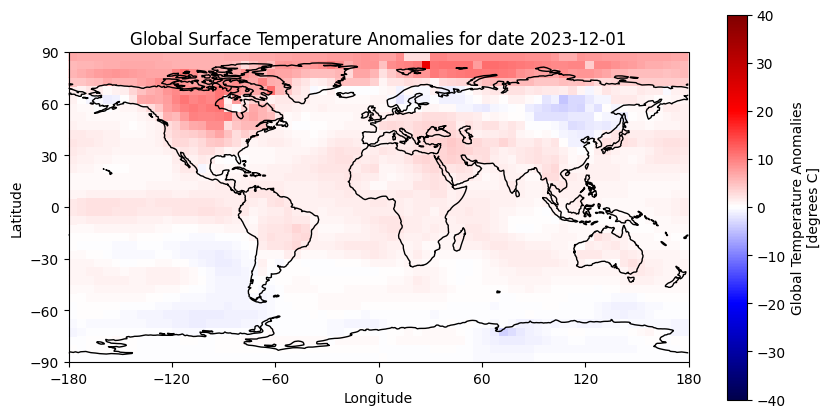

In [19]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import datetime as dt

plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
vmin = temp_ds.anom.attrs["valid_min"]
vmax = temp_ds.anom.attrs["valid_max"]
vmin_abs = abs(vmin)
abs_max = max(vmin_abs, vmax)

timeslice = temp_ds.sel(time=dt.datetime(2023,12,1), method="nearest")   # edit to date of choice
timeslice.anom.plot(ax=ax, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree(), cmap="seismic")
ax.coastlines()
plt.title(f'Global Surface Temperature Anomalies for date {timeslice.time.values.astype("datetime64[D]")}')
ax.set_xticks(range(-180, 181, 60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-90, 91, 30), crs=ccrs.PlateCarree())
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [20]:
df_temp = temp_ds.to_dataframe()

In [21]:
df_temp.reset_index(inplace=True)

In [22]:
df_temp

,time,lat,lon,z,anom
0,1850-01-01,-87.5,2.5,0.0,-0.177575
1,1850-01-01,-87.5,7.5,0.0,-0.177575
2,1850-01-01,-87.5,12.5,0.0,-0.177575
3,1850-01-01,-87.5,17.5,0.0,-0.177575
4,1850-01-01,-87.5,22.5,0.0,-0.177575
...,...,...,...,...,...
5412091,2023-12-01,87.5,337.5,0.0,7.650163
5412092,2023-12-01,87.5,342.5,0.0,7.736040
5412093,2023-12-01,87.5,347.5,0.0,7.826920
5412094,2023-12-01,87.5,352.5,0.0,8.140000


In [123]:
land_ds = xr.open_dataset("data/CSR_GRACE_GRACE-FO_RL06_Mascons_v02_LandMask.nc")
land_ds

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    LO_val   (lat, lon) float32 ...
Attributes: (12/14)
    Conventions:     CF-1.5
    data_reference:  Save, H., S. Bettadpur, B. D. Tapley (2016), High resolu...
    data_author:     Himanshu Save (save@csr.utexas.edu)
    url:             https://doi.org/10.15781/cgq9-nh24
    doi:             10.15781/cgq9-nh24
    summary:         CSR RL06 Mascon V02 Land Mask
    ...              ...
    variable:        Land=1 and Ocean=0
    Longitudes:       LON1_NLONS_DLON=0.125. 1440 0.25
    Latitudes:        LAT1_NLATS_DLAT=-89.875 720 0.25
    label:           Land_Mask_RL06M
    Mask:            Global
    DATE_CREATED:    Fri Jul 12 10:41:31 CDT 2019

In [129]:
land_ds.attrs

{'Conventions': 'CF-1.5',
 'data_reference': 'Save, H., S. Bettadpur, B. D. Tapley (2016), High resolution CSR GRACE RL05 mascons, J. Geophys. Res. Solid Earth',
 'data_author': 'Himanshu Save (save@csr.utexas.edu)',
 'url': 'https://doi.org/10.15781/cgq9-nh24',
 'doi': '10.15781/cgq9-nh24',
 'summary': 'CSR RL06 Mascon V02 Land Mask',
 'filename': 'netcdf/CSR_GRACE_GRACE-FO_RL06_Mascons_v02_LandMask.nc',
 'institution': 'The University of Texas - Center for Space Research (CSR)',
 'variable': 'Land=1 and Ocean=0',
 'Longitudes': ' LON1_NLONS_DLON=0.125. 1440 0.25',
 'Latitudes': ' LAT1_NLATS_DLAT=-89.875 720 0.25',
 'label': 'Land_Mask_RL06M',
 'Mask': 'Global',
 'DATE_CREATED': 'Fri Jul 12 10:41:31 CDT 2019'}

In [113]:
land_ds.LO_val

<xarray.DataArray 'LO_val' (lat: 720, lon: 1440)>
[1036800 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Attributes:
    units:       
    long_name:   Land_Mask
    short_name:  LandMask

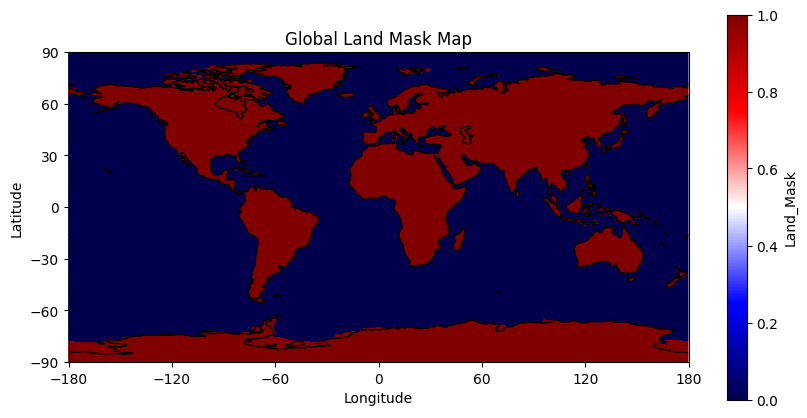

In [125]:
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
land_ds.LO_val.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="seismic")
ax.coastlines()
plt.title(f'Global Land Mask Map')
ax.set_xticks(range(-180, 181, 60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-90, 91, 30), crs=ccrs.PlateCarree())
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()